In [ ]:
import pandas as pd
import numpy as np

# Documentation

In this lab task, the variable df refers to the dataframe or the data loaded
We use simplifications such as pd for pandas and np for numpy

lower_case letters refer to vectors and upper case letters refer to matrices in numpy

Parameters are referrred to as w, which is essentially θ for the hypothesis function h(Θ)=Θ$^T$X where X is the input features with x$_0$ =1 to accomodate the Θ$_0$ as bias/intercept. The cost function used is the Mean Squared Cost which is essentially given by $J(Θ)=1/(2m)∑(h(Θ) -̂\hat{y})^2$. The implementations are given below in accordance to the lab tasks

The input feature is referred to as X and the output is referred to as y.

All hyperparamters has been written using Uppercase Letters to denote them as constants

# Task 1

Load the classification dataset.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/house_price_data.csv')
df = df.set_axis(['size_sqft','number_of_bedrooms','price'],axis='columns')

# Task 2
Plot the class features and color them according to your class label. [Hint: Use Scatterplot]

In [ ]:
import matplotlib.pyplot as plt

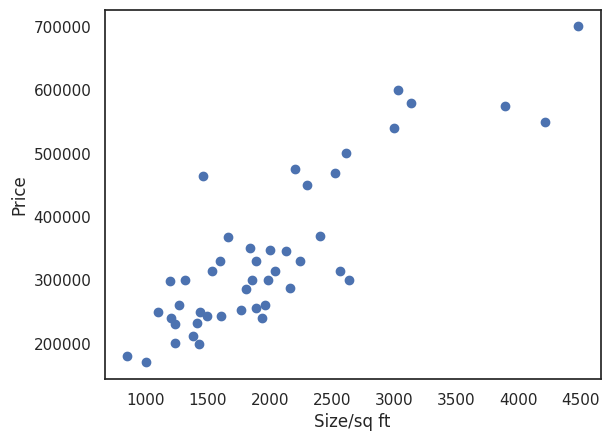

In [ ]:
plt.scatter(df['size_sqft'],df['price'])
plt.xlabel('Size/sq ft')
plt.ylabel('Price')
plt.show()

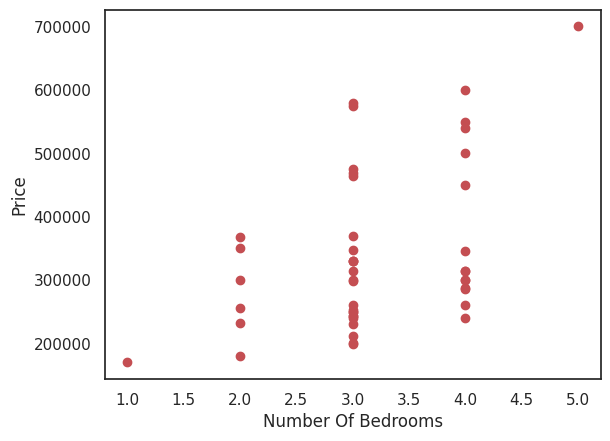

In [ ]:
plt.scatter(df['number_of_bedrooms'],df['price'],c=['r'])
plt.xlabel('Number Of Bedrooms')
plt.ylabel('Price')
plt.show()

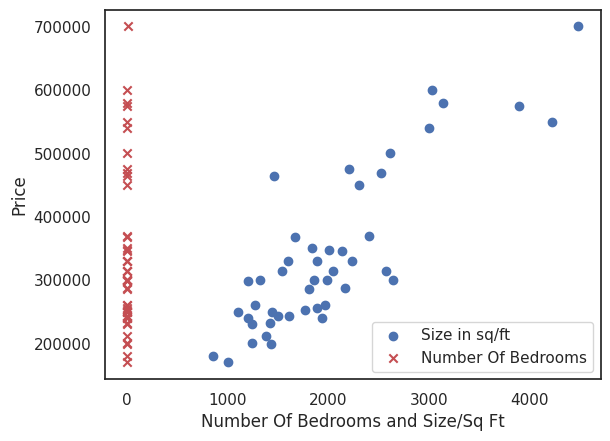

In [ ]:
plt.scatter(df['size_sqft'],df['price'],label='Size in sq/ft')
plt.scatter(df['number_of_bedrooms'],df['price'],c=['r'],marker='x',label='Number Of Bedrooms')
plt.xlabel('Number Of Bedrooms and Size/Sq Ft')
plt.ylabel('Price')
plt.legend()
plt.show()

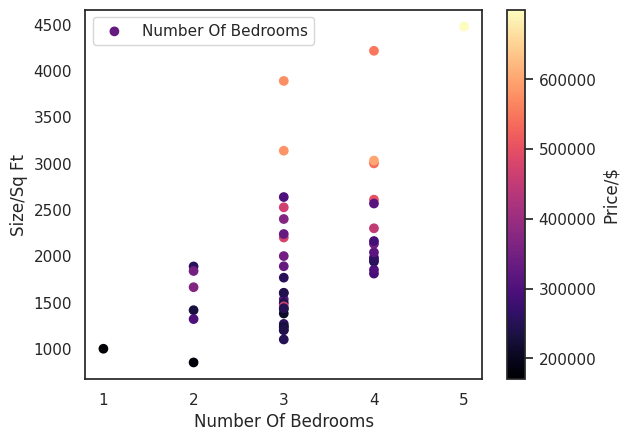

In [ ]:
scatter=plt.scatter(df['number_of_bedrooms'],df['size_sqft'],c=df['price'],cmap='magma',marker='o',label='Number Of Bedrooms')
plt.xlabel('Number Of Bedrooms')
plt.ylabel('Size/Sq Ft')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Price/$')
plt.legend()
plt.show()

# Task 3
Display the statistical information per class of the feature matrix like mean, median, standard
deviation and variance.

In [ ]:
MAX_BEDROOMS = df['number_of_bedrooms'].max()
MIN_BEDROOMS = df['number_of_bedrooms'].min()
MAX_SIZE_SQFT = df['size_sqft'].max()
MIN_SIZE_SQFT = df['size_sqft'].min()
df.describe()

,size_sqft,number_of_bedrooms,price
count,46.000000,46.000000,46.000000
mean,1998.434783,3.173913,339119.456522
std,803.333019,0.768963,126103.418369
min,852.000000,1.000000,169900.000000
25%,1429.500000,3.000000,249900.000000
50%,1870.000000,3.000000,299900.000000
75%,2284.500000,4.000000,368875.000000
max,4478.000000,5.000000,699900.000000


# Task 4
Prepare the dataset by normalizing or scaling the feature set. [Hint: Normalization range -1 to
1 or 0 to 1]
**Note: Normalization is necessary for scaling a dataset which has largely varying data in order to reduce the time required for training.**

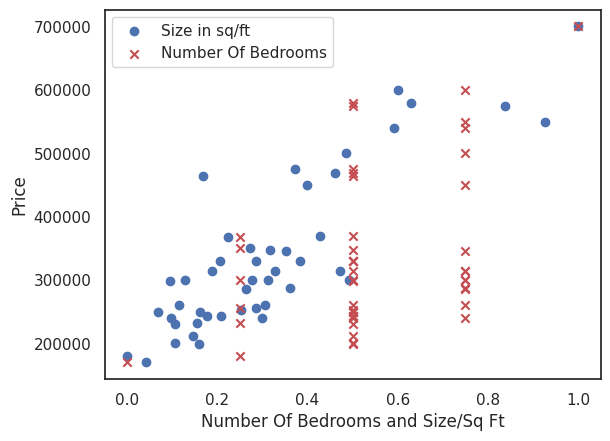

In [ ]:
# Applying MinMax Normalization to the input features
df['size_sqft'] = (df['size_sqft']-df['size_sqft'].min())/(df['size_sqft'].max()-df['size_sqft'].min())
df['number_of_bedrooms'] = (df['number_of_bedrooms']-df['number_of_bedrooms'].min())/(df['number_of_bedrooms'].max()-df['number_of_bedrooms'].min())
#After normalization plot
plt.scatter(df['size_sqft'],df['price'],label='Size in sq/ft')
plt.scatter(df['number_of_bedrooms'],df['price'],c=['r'],marker='x',label='Number Of Bedrooms')
plt.xlabel('Number Of Bedrooms and Size/Sq Ft')
plt.ylabel('Price')
plt.legend()
plt.show()

# Task 5
Prepare the training and testing dataset. Split them into a 80-20% ratio size.

In [ ]:
X_normalized=df[['size_sqft','number_of_bedrooms']]
y=np.array(df['price'])
X_normalized_b=np.c_[np.ones((len(df['size_sqft']),1)),X_normalized]
training_size=int(len(y)*(4/5))
X_train,X_test,y_train,y_test=X_normalized_b[:training_size],X_normalized_b[training_size:],y[:training_size],y[training_size:]

# Task 6
Implement the hypothesis function.

In [ ]:
def hypothesis(w, X):
    return np.dot(X,w)
#hypothesis([1,2,3],X_train)

# Task 7
Implement the cost function.

In [ ]:
def mean_squared_cost_function(W, X, y):
    m = X.shape[0]
    y_predicted = hypothesis(W, X)
    return np.sum(np.square(y_predicted - y)) / (2 * m)
#mean_squared_cost_function([1,2,3],X_train,Y_train)

# Task 8
Implement the gradient descent function.

In [ ]:
def gradient_descent(X, y, learning_rate=0.1, num_epochs=10):
    num_features = X.shape[1]
    W = np.random.rand(num_features)
    cost = []

    m = y.shape[0]
    for i in range(num_epochs):
        gradients = (1/m) * np.matmul((hypothesis(W, X) - y).T, X)
        W = W - learning_rate * gradients
        cost.append(mean_squared_cost_function(W, X, y))

    return W, cost

# Task 9
Find the best fitted line with the gradient descent function

In [ ]:
NUM_EPOCHS=3000
LEARNING_RATE=0.01
w, J_all = gradient_descent(X_train,y_train,LEARNING_RATE,NUM_EPOCHS)
print("Parameters: ",w)
print("Cost: ",mean_squared_cost_function(w,X_normalized_b,y))

Parameters:  [160145.94691116 362044.51560842 132393.31728386]
Cost:  2520469327.0768523


# Task 10
Plot the best fitted line using matplotlib

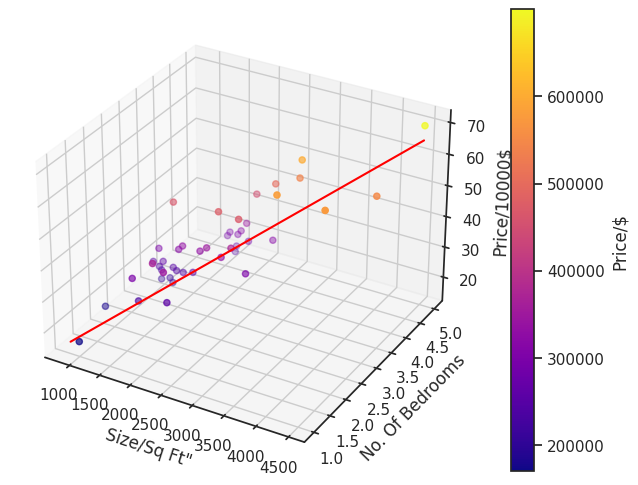

In [ ]:
import seaborn as sns
sns.set_style("white")
fig = plt.figure(figsize=(10,6))
ax=plt.axes(projection='3d')
x_coordinates = np.arange(0,1,0.001)
y_coordinates = np.arange(0,1,0.001)
z_coordinates = np.multiply(w[1],x_coordinates)+np.multiply(w[2],y_coordinates)+w[0]
ax.plot3D((x_coordinates*(MAX_SIZE_SQFT-MIN_SIZE_SQFT)+MIN_SIZE_SQFT), (y_coordinates*(MAX_BEDROOMS-MIN_BEDROOMS)+MIN_BEDROOMS), z_coordinates/10000, 'red')
ax.set_xlabel('Size/Sq Ft"')
ax.set_ylabel('No. Of Bedrooms')
ax.set_zlabel('Price/10000$')
#Below y refers to the actual price
scatter=ax.scatter3D(X_normalized_b.T[1]*(MAX_SIZE_SQFT-MIN_SIZE_SQFT)+MIN_SIZE_SQFT,X_normalized_b.T[2]*(MAX_BEDROOMS-MIN_BEDROOMS)+MIN_BEDROOMS,y/10000,c=y, cmap='plasma')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Price/$')
plt.show()

# Task 11
Plot graph of cost function vs. epoch.

Text(0, 0.5, 'Cost/1e10')

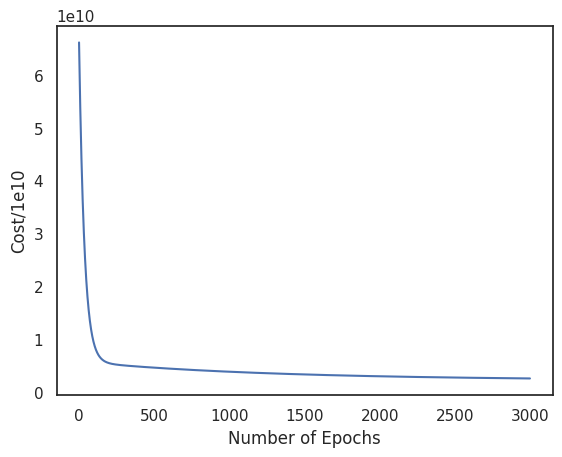

In [ ]:
plt.plot(np.arange(0,NUM_EPOCHS),J_all)
plt.xlabel("Number of Epochs")
plt.ylabel("Cost/1e10")

# Task 12
Implement the linear regression model with sklearn library.

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/house_price_data.csv')
df=df.set_axis(['size_sqft','number_of_bedrooms','price'],axis='columns')

In [ ]:
#Performing Normalization
from sklearn.preprocessing import MinMaxScaler
X=np.array(df[['size_sqft','number_of_bedrooms']])
y=np.array(df['price'])
scaler=MinMaxScaler()
scaler.fit(X)
X_normalized=scaler.transform(X)

In [ ]:
#Split into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X_normalized,y,test_size=0.25,shuffle=False)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear_regression=LinearRegression()
linear_regression.fit(X_train,y_train)
bias,weights=linear_regression.intercept_,linear_regression.coef_
print("Parameters: ",bias,weights[0],weights[1])
print("Cost: ", mean_squared_error(y, linear_regression.predict(X), squared=True))

Parameters:  171653.44315084003 546741.3931126792 571.3609147820711
Cost:  1.3820957881063654e+18


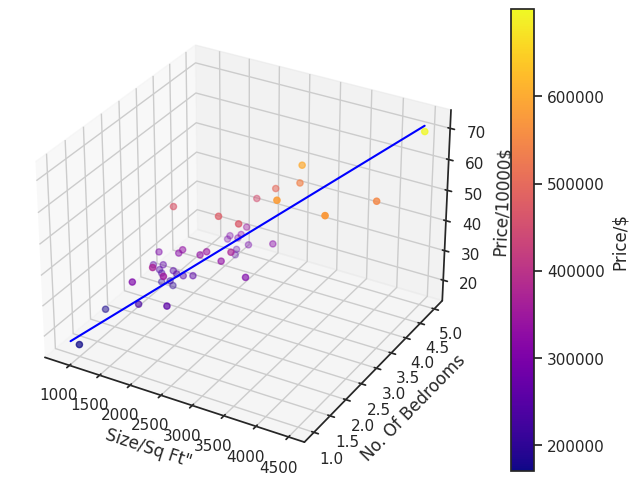

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(10,6))
ax=plt.axes(projection='3d')
sns.set(style="white")
x_coordinates=np.arange(0,1,0.001)
y_coordinates=np.arange(0,1,0.001)
z_coordinates=linear_regression.predict(np.array([x_coordinates,y_coordinates]).T)
ax.plot3D((x_coordinates*(MAX_SIZE_SQFT-MIN_SIZE_SQFT)+MIN_SIZE_SQFT), (y_coordinates*(MAX_BEDROOMS-MIN_BEDROOMS)+MIN_BEDROOMS), z_coordinates/10000, 'blue')
ax.set_xlabel('Size/Sq Ft"')
ax.set_ylabel('No. Of Bedrooms')
ax.set_zlabel('Price/10000$')
scatter=ax.scatter3D(X_normalized.T[0]*(MAX_SIZE_SQFT-MIN_SIZE_SQFT)+MIN_SIZE_SQFT,X_normalized.T[1]*(MAX_BEDROOMS-MIN_BEDROOMS)+MIN_BEDROOMS,y/10000,c=y, cmap='plasma')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Price/$')

plt.show()